In [30]:
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import torchvision.datasets as datasets
import torch
from torch.optim import Adam, SGD

In [3]:
class MnistModel(nn.Module):
  def __init__(self) -> None:
      super().__init__()
      self.lin1 = nn.Linear(784, 256)
      self.lin2 = nn.Linear(256, 64)
      self.lin3 = nn.Linear(64, 10)

  def forward(self, X):
      x1 = F.relu(self.lin1(X))
      x2 = F.relu(self.lin2(x1))
      x3 = F.relu(self.lin3(x2))
      return x3

  # Fit function
  def fit(self, X, y, optimizer, loss_fn, epochs):

    for epoch in range(epochs):

      ypred = self.forward(X)
      loss = loss_fn(ypred, y)

      optimizer.zero_grad()

      loss.backward()

      optimizer.step()


In [ ]:
# Data fetching

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)

trainimages = mnist_trainset.data
trainimages = trainimages.float().flatten(start_dim=1, end_dim=2)
trainlabels = mnist_trainset.targets

In [5]:
numpydatas = trainimages[0].numpy()

print(trainlabels)


tensor([5, 0, 4,  ..., 5, 6, 8])


In [6]:
model = MnistModel()

# Adam for local training phase and first 50 epochs of collaborative phase
# SGD is for the last 50 epochs of the collaborative phase
optim_adam = Adam(model.parameters(), lr=5e-4)
optim_sgd = SGD(model.parameters(), lr=1e-3)

# Loss function is same for all epochs
loss_fn = nn.CrossEntropyLoss()



In [12]:
model.fit(trainimages, trainlabels, optimizer=optim_adam, loss_fn=loss_fn, epochs=1000)

In [20]:
results = model.forward(trainimages)
results = torch.argmax(results, dim=1)
error = torch.mean((results != trainlabels).float())
print(error)

tensor(0.1026)


In [14]:
import cv2

image = "four.jpg"

img = cv2.imread(image,cv2.IMREAD_GRAYSCALE) #Read the image as a grayscale
resized = cv2.resize(img, (28,28))  #Resize the data to the MNIST dimensions
features = resized.reshape(1,-1) #Get the image in the form of an array

cv2.imshow('M', resized)

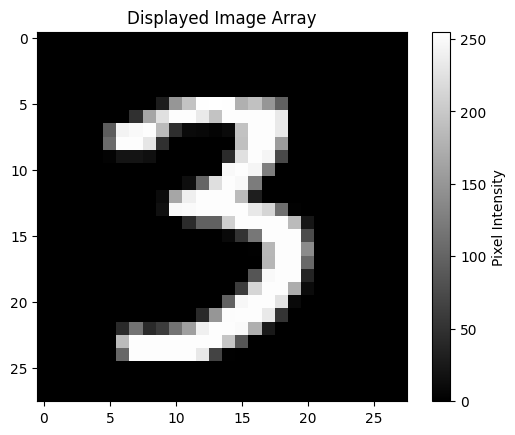

In [36]:
import matplotlib.pyplot as plt

plt.imshow(trainimages[10000], cmap='gray') # 'gray' colormap is suitable for 2D grayscale arrays
plt.title("Displayed Image Array")
plt.colorbar(label='Pixel Intensity') # Add a color bar for better interpretation
plt.show()

In [19]:
features = torch.from_numpy(features)
features = features.float()

model.forward(features)

tensor([[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  9.3387,  0.0000,  0.0000,
         24.0129,  0.0000]], grad_fn=<ReluBackward0>)

In [16]:
print(features.shape)
print(features.type)

torch.Size([1, 784])
<built-in method type of Tensor object at 0x7f8d6b7f2d00>
